In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) =mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [6]:
single_image=X_train[0]
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

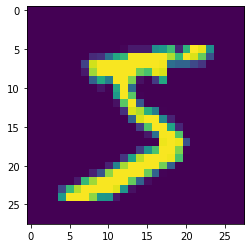

In [7]:
plt.imshow(single_image)

In [8]:
single_image=single_image/255

In [9]:
single_image


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
#convert into to categorical
from tensorflow.keras.utils import to_categorical
y_example=to_categorical(y_train)

In [13]:
y_example.shape

(60000, 10)

In [14]:
y_example[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
y_cat_test =to_categorical(y_test)
y_cat_train =to_categorical(y_train)

In [17]:
X_train=X_train/255
X_test=X_test/255

In [18]:
scaled_image=X_train[0]

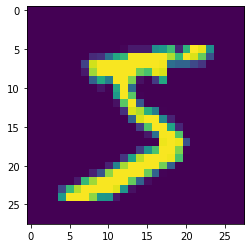

In [21]:
plt.imshow(scaled_image)

In [23]:
#batch_size,width,heigth,colur_channels
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

model =Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation="relu"))

#output layer -softmax-->multiclass classifcation
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])



In [29]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop =EarlyStopping(monitor="val_loss",patience=1)


In [30]:
model.fit(X_train,
          y_cat_train,
          epochs=10,
          validation_data=(X_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1324 - accuracy: 0.9598 - val_loss: 0.0534 - val_accuracy: 0.9833
Epoch 2/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0455 - accuracy: 0.9865 - val_loss: 0.0391 - val_accuracy: 0.9873
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0305 - accuracy: 0.9901 - val_loss: 0.0468 - val_accuracy: 0.9854


In [31]:
metrics =pd.DataFrame(model.history.history)
metrics

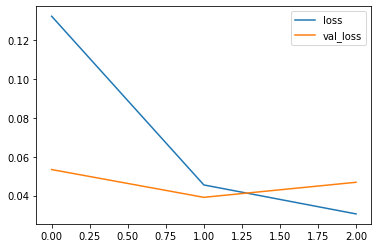

In [32]:
metrics[["loss","val_loss"]].plot()

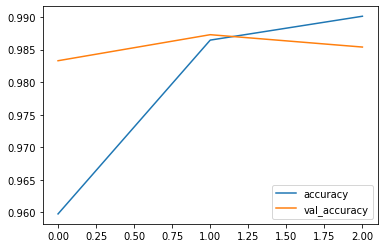

In [33]:
metrics[["accuracy","val_accuracy"]].plot()

In [34]:
model.metrics_names

['loss', 'accuracy']

In [35]:
model.evaluate(X_test,y_cat_test)


313/313 [==============================] - 2s 7ms/step - loss: 0.0468 - accuracy: 0.9854


[0.0468246191740036, 0.9854000210762024]

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
predictions =model.predict(X_test)

In [57]:
import tensorflow as tf

In [58]:
predictions=tf.round(predictions)
predictions[:10]

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [59]:
print(classification_report(y_cat_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.97      0.98       892
           6       1.00      0.97      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       1.00      0.96      0.98      1009

   micro avg       0.99      0.98      0.99     10000
   macro avg       0.99      0.98      0.99     10000
weighted avg       0.99      0.98      0.99     10000
 samples avg       0.98      0.98      0.98     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
import numpy as np
rounded_labels=np.argmax(predictions, axis=1)
rounded_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

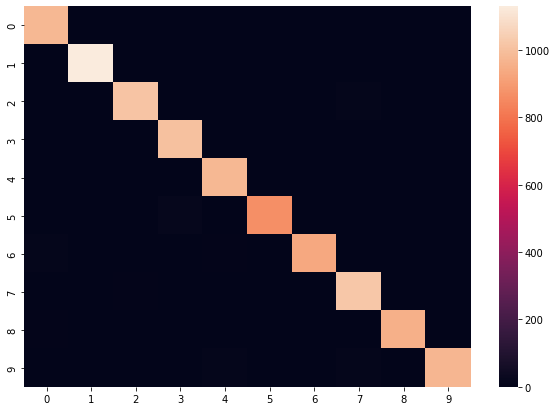

In [65]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,rounded_labels))

In [66]:
my_number=X_test[0]

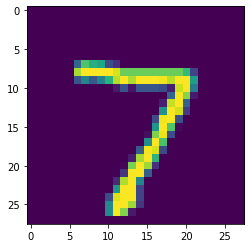

In [67]:
plt.imshow(my_number.reshape(28,28))

In [70]:
predcit=model.predict(my_number.reshape(1,28,28,1))

In [71]:
predict=tf.round(predcit)
import numpy as np
rounded_labels=np.argmax(predict, axis=1)
rounded_labels


array([7])